In [1]:
import matplotlib as mpl
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np
import sklearn
import pandas as pd
import os
import sys
import time
import tensorflow as tf

from tensorflow import keras
print(sys.version_info)
for module in mpl, np, pd, sklearn, tf, keras:
    print(module.__name__, module.__version__)

sys.version_info(major=3, minor=7, micro=5, releaselevel='final', serial=0)
matplotlib 3.1.2
numpy 1.17.4
pandas 0.25.3
sklearn 0.22
tensorflow 2.0.0
tensorflow_core.keras 2.2.4-tf


## 1. 准备并处理数据

### 1.1 准备数据

In [2]:
from sklearn.datasets import fetch_california_housing
housing = fetch_california_housing()
print(housing.data.shape)
print(housing.target.shape)

(20640, 8)
(20640,)


In [3]:
import pprint

pprint.pprint(housing.data[0:3])
pprint.pprint(housing.target[0:3])

array([[ 8.32520000e+00,  4.10000000e+01,  6.98412698e+00,
         1.02380952e+00,  3.22000000e+02,  2.55555556e+00,
         3.78800000e+01, -1.22230000e+02],
       [ 8.30140000e+00,  2.10000000e+01,  6.23813708e+00,
         9.71880492e-01,  2.40100000e+03,  2.10984183e+00,
         3.78600000e+01, -1.22220000e+02],
       [ 7.25740000e+00,  5.20000000e+01,  8.28813559e+00,
         1.07344633e+00,  4.96000000e+02,  2.80225989e+00,
         3.78500000e+01, -1.22240000e+02]])
array([4.526, 3.585, 3.521])


In [4]:
from sklearn.model_selection import train_test_split

x_train_all, x_test, y_train_all, y_test = train_test_split(housing.data, housing.target,)
#                                                             random_state= 7)
x_train, x_valid, y_train, y_valid = train_test_split(x_train_all, y_train_all, )
#                                                       random_state = 11)
print(x_train.shape, y_train.shape)
print(x_valid.shape, y_valid.shape)
print(x_test.shape, y_test.shape)

(11610, 8) (11610,)
(3870, 8) (3870,)
(5160, 8) (5160,)


### 1.2 数据归一化

In [5]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
x_train_scaled = scaler.fit_transform(x_train)
x_valid_scaled = scaler.transform(x_valid)
x_test_scaled = scaler.transform(x_test)

## 2.【重点】 建立模型及训练（手动搜索超参数）

手动搜索超参数缺点：超参数太多，循环太多，顺序执行，不能并行化；

In [6]:
learning_rates = [1e-4, 3e-4, 1e-3, 1e-2, 3e-2]   # 超参数（学习率）列表
histories = []
for lr in learning_rates:
    model = keras.models.Sequential([
        keras.layers.Dense(30, activation="relu", input_shape=x_train.shape[1:]),
        keras.layers.Dense(1)
    ])
    optimizer = keras.optimizers.SGD(lr)
    model.compile(loss="mean_squared_error", optimizer=optimizer)
    callbacks = [keras.callbacks.EarlyStopping(patience=5, min_delta=1e-2)]
    history = model.fit(x_train_scaled, y_train, 
                       validation_data = (x_valid_scaled, y_valid),
                       epochs = 100,
                       callbacks = callbacks)
    histories.append(history)

Train on 11610 samples, validate on 3870 samples
Epoch 1/100
11610/11610 [==============================] - 1s 78us/sample - loss: 4.6328 - val_loss: 4.0131
Epoch 2/100
11610/11610 [==============================] - 0s 34us/sample - loss: 3.4647 - val_loss: 3.0528
Epoch 3/100
11610/11610 [==============================] - 0s 33us/sample - loss: 2.6965 - val_loss: 2.4098
Epoch 4/100
11610/11610 [==============================] - 0s 34us/sample - loss: 2.1784 - val_loss: 1.9734
Epoch 5/100
11610/11610 [==============================] - 0s 36us/sample - loss: 1.8196 - val_loss: 1.6700
Epoch 6/100
11610/11610 [==============================] - 0s 37us/sample - loss: 1.5640 - val_loss: 1.4540
Epoch 7/100
11610/11610 [==============================] - 0s 37us/sample - loss: 1.3770 - val_loss: 1.2973
Epoch 8/100
11610/11610 [==============================] - 0s 39us/sample - loss: 1.2365 - val_loss: 1.1793
Epoch 9/100
11610/11610 [==============================] - 0s 32us/sample - loss: 1.128

## 3. 训练模型

Learning rate is :  0.0001


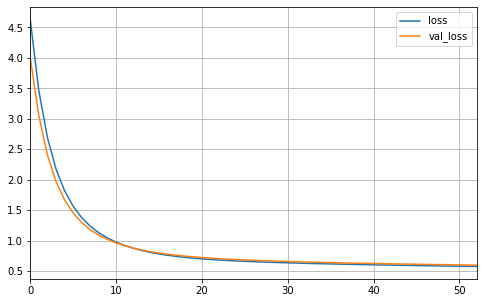

Learning rate is :  0.0003


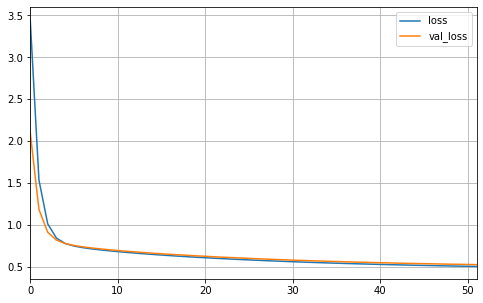

Learning rate is :  0.001


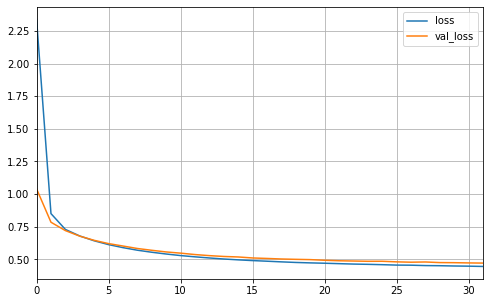

Learning rate is :  0.01


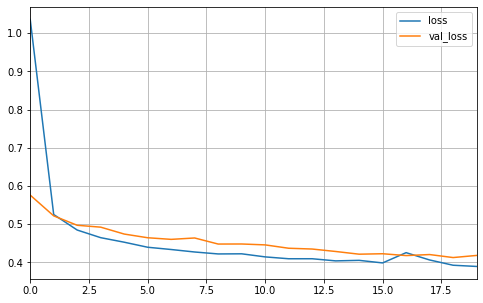

Learning rate is :  0.03


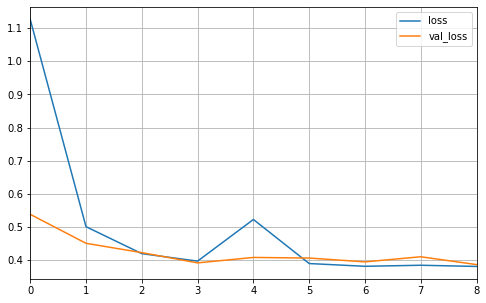

In [7]:
def plot_learning_curves(history):
    pd.DataFrame(history.history).plot(figsize=(8, 5))
    plt.grid(True)
#     plt.gca().set_ylim(0, 1)
    plt.show()
for lr, history in zip(learning_rates, histories):
    print("Learning rate is : ", lr)
    plot_learning_curves(history)